In [18]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,  cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
# Load data and drop unnecessary attributes
data = pd.read_csv("lungcancer.csv").drop(["Name", "Surname"], axis=1)

# Split data into features (X) and target variable (y)
X, y = data.drop("Result", axis=1), data["Result"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Initialize and train the KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

In [21]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9166666666666666


In [22]:
# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[8 0]
 [1 3]]


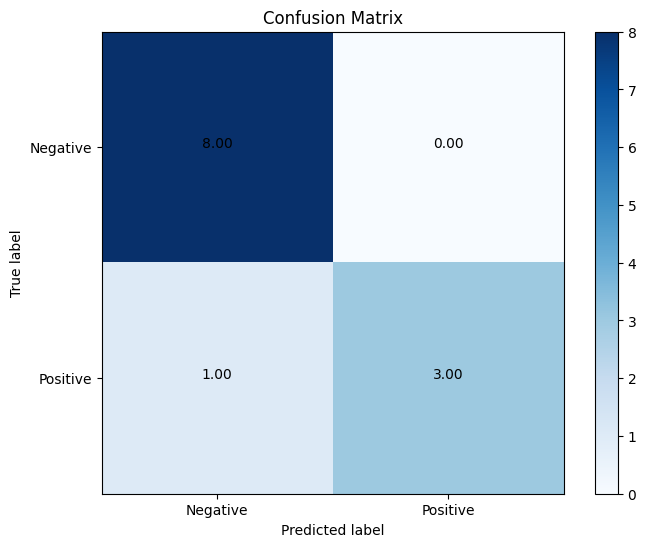

In [23]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, f'{conf_matrix[i, j]:.2f}', horizontalalignment="center", color="black")

plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ["Negative", "Positive"])
plt.yticks([0, 1], ["Negative", "Positive"])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [24]:
# Find the optimum value of k
k_values = list(range(2, 21))
accuracy_values = [cross_val_score(KNeighborsClassifier(n_neighbors=k), X_train, y_train, cv=5, scoring='accuracy').mean() for k in k_values]

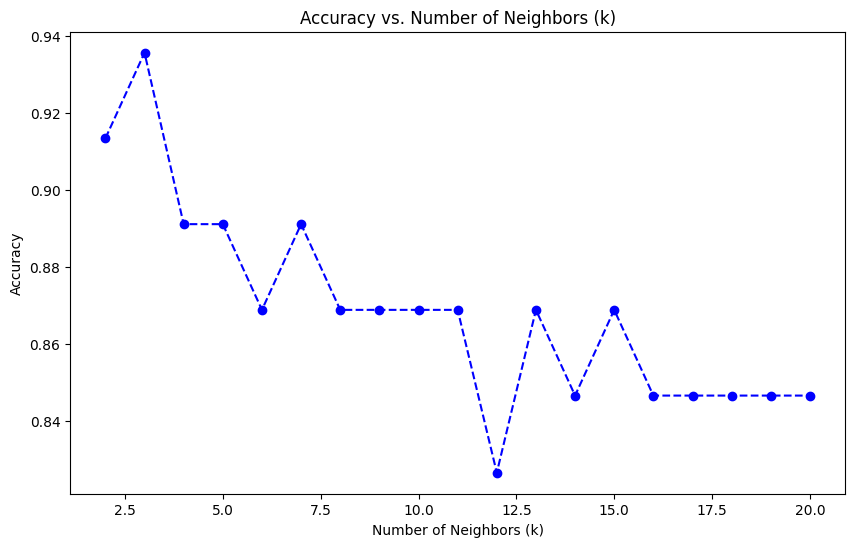

In [25]:
# Plot accuracy vs. k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_values, marker='o', linestyle='dashed', color='blue')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.show()

In [26]:
# Find the optimum value of k
optimal_k = k_values[np.argmax(accuracy_values)]
print("Optimal value of k:", optimal_k)

Optimal value of k: 3
